In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
#import tensorflow as tf
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [5]:
# load dataset
loc = r'/home/anshul/Downloads/final_data_CS771.csv'
dataframe = pd.read_csv(loc)
dataset = dataframe.values
print(dataset[0,:])

# split into input (X) and output (Y) variables
X = dataset[:,1:72]
Y = dataset[:,0]

[208500     65   8450      7    196    706    150    856    856    854
   1710      1      2      1      8      0      2    548      0     61
      0      1      1      0      1      0      0      0      0      1
      1      0      1      1      1      0      0      1      0      0
      1      0      0      0      1      0      1      0      1      1
      0      0      1      1      0      0      0      0      1      1
      0      0      0      0      0      1      1      1      0      1
      0      0]


In [6]:
#Splitting the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20, random_state= 12)
print(Ytest.shape)

(291,)


In [33]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(71, input_dim=71, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse', 'mae', 'mape', 'cosine'])
	return model

In [42]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1, verbose=0)

#standardised
std_est = []
std_est.append(('standardize', StandardScaler()))
std_est.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(std_est)

In [43]:
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, Y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

#fitting the model
history = estimator.fit(Xtrain, Ytrain)
std_his = pipeline.fit(Xtrain, Ytrain)

# evaluate the model
#scores = estimator.scoree(Xtrain, Ytrain)
#print("\n%s: %.2f%%" % (baseline_model.metrics_names[1], scores[1]*100))

#making predictions
predictions = estimator.predict(Xtest)

/home/anshul/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
print(np.sqrt(-estimator.score(Xtest, Ytest)))
print(predictions.astype(dtype=int))
print(Ytest)

45217.73368344836
[186197 163843 118000 394576 113356 304407 192850 245235  69430 238879
 210909 115845 203593 140514 163125 264440 217977 149019 165448 155509
 153943 174860 144527  83049 261849 169439 144022 164831 146561 148175
 171394 257256 215452  97002 206278 171286 320054 151651 153004  61931
 174934 133415 338712 132964 149647 140004 115407 194271  90486 136459
 246286 142016 136155 298710 279378 165985 116914 154263 143268 221650
 243058 242709 230166 207845 229480 288593 113677 242740 186588 134608
 218718 217471 187492 137723 228510 324803 133296 146273 259506 159233
 157258 185288 204709 256325 240304 149533 219335 150491 240691 123563
 130514 135543  59603 216172 180274 201244 210899 135465 206417 189114
 126703 126148 200509 214755 120335 181935 101064 318240 233066  95093
 272977 255599 166328  65838 182955 236058 134961 234196 219417 226873
 204444 277570 214512 350713 231027 196965 210712 121251 183657 148332
 322136 186105 146962 119092 209563  53249 342065 143084 17

RMSE on train data 181.66
RMSE on test data 46207.58


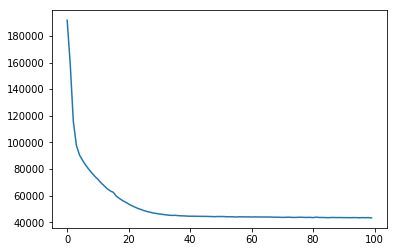

In [41]:
rmse_train = np.sqrt(np.mean(history.history['mean_absolute_error']))
pyplot.plot(np.sqrt(history.history['mean_squared_error']))

rmse_predict = np.sqrt(np.mean(np.square(-predictions + Ytest)))
#, epochs=100, batch_size=5,  verbose=0
print('RMSE on train data %.2f' %rmse_train)
print('RMSE on test data %.2f' %rmse_predict)